# **Trabajo Final Arquitectura de Computadores**


### *Martín Gómez Caicedo*
### *Juan Camilo Muñoz*
### *Manuel Cardona*
### *Alejandro Mejía Mejía*


En primer lugar definimos el orden de ejecución

In [ ]:
# Lista de ejecutables
import random
versions = [
".\ProductMatrix_X64_d_verA.exe",
".\ProductMatrix_X64_d_verB.exe",
".\ProductMatrix_X64_d_verC.exe",
".\ProductMatrix_X64_d_verD.exe",
".\ProductMatrix_X64_d_verE.exe",
".\ProductMatrix_X64_d_verF.exe",
".\ProductMatrix_X64_f_verA.exe",
".\ProductMatrix_X64_f_verB.exe",
".\ProductMatrix_X64_f_verC.exe",
".\ProductMatrix_X64_f_verD.exe",
".\ProductMatrix_X64_f_verE.exe",
".\ProductMatrix_X64_f_verF.exe",
".\ProductMatrix_X86_d_verA.exe",
".\ProductMatrix_X86_d_verB.exe",
".\ProductMatrix_X86_d_verC.exe",
".\ProductMatrix_X86_d_verD.exe",
".\ProductMatrix_X86_d_verE.exe",
".\ProductMatrix_X86_d_verF.exe",
".\ProductMatrix_X86_f_verA.exe",
".\ProductMatrix_X86_f_verB.exe",
".\ProductMatrix_X86_f_verC.exe",
".\ProductMatrix_X86_f_verD.exe",
".\ProductMatrix_X86_f_verE.exe",
".\ProductMatrix_X86_f_verF.exe"
]

# Lista de tamaños de matriz
matrix_sizes = [170, 440, 565, 670, 780, 915, 1185, 1470, 1700, 2050] # indique los niveles asignados por el profesor
samples =      [15,  15,  15,   15,  10,  10,    7,  5,    3,   3]


# Generar combinaciones
combinations = [
    (version, size, sample)
    for version in versions
    for size, sample in zip(matrix_sizes, samples)
]
# Aleatorizar la lista de combinaciones
random.shuffle(combinations)

# Mostrar combinaciones aleatorizadas
for combination in combinations:
    print(combination[0], combination[1],  combination[2])


.\ProductMatrix_X64_d_verE.exe 1185 7
.\ProductMatrix_X64_d_verB.exe 565 15
.\ProductMatrix_X86_f_verE.exe 565 15
.\ProductMatrix_X64_d_verC.exe 1470 5
.\ProductMatrix_X86_f_verD.exe 1470 5
.\ProductMatrix_X86_f_verC.exe 1185 7
.\ProductMatrix_X86_d_verE.exe 780 10
.\ProductMatrix_X86_f_verF.exe 170 15
.\ProductMatrix_X86_d_verE.exe 440 15
.\ProductMatrix_X86_d_verD.exe 670 15
.\ProductMatrix_X86_f_verF.exe 780 10
.\ProductMatrix_X86_f_verF.exe 670 15
.\ProductMatrix_X86_f_verE.exe 1185 7
.\ProductMatrix_X86_f_verF.exe 1185 7
.\ProductMatrix_X64_d_verB.exe 170 15
.\ProductMatrix_X64_f_verC.exe 1700 3
.\ProductMatrix_X64_f_verD.exe 780 10
.\ProductMatrix_X86_d_verF.exe 915 10
.\ProductMatrix_X86_d_verA.exe 670 15
.\ProductMatrix_X86_d_verF.exe 1185 7
.\ProductMatrix_X86_d_verB.exe 780 10
.\ProductMatrix_X64_f_verC.exe 670 15
.\ProductMatrix_X64_d_verE.exe 1700 3
.\ProductMatrix_X64_f_verA.exe 1700 3
.\ProductMatrix_X64_f_verB.exe 2050 3
.\ProductMatrix_X64_d_verC.exe 670 15
.\ProductMat

En esta celda, cargamos los datos desde el archivo ReporteResultados.xlsx para cada hoja (ReportePC y ReporteLaptop). Renombramos las columnas y convertimos ciertas variables en categorías para facilitar el análisis posterior. Además de importar las librerías necesarias

In [ ]:
# Importar librerías necesarias
!pip install researchpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import numpy as np

# Cargar y preparar los conjuntos de datos desde las dos hojas
df_pc = pd.read_excel("ReporteResultados.xlsx", sheet_name="ReportePC")
df_laptop = pd.read_excel("ReporteResultados.xlsx", sheet_name="ReporteLaptop")

# Renombrar columnas para facilitar el acceso y transformar columnas en categorías
for df in [df_pc, df_laptop]:
    df.rename(columns={"ver": "version", "typeData": "type", "ISA": "ISA_type"}, inplace=True)
    df['version'] = pd.Categorical(df['version'].str.strip())  # Eliminar espacios y convertir en categoría
    df['type'] = pd.Categorical(df['type'].str.strip())  # Convertir 'type' en categoría
    df['size'] = pd.Categorical(df['n'])  # Convertir 'n' (tamaño de matriz) en categoría
    df['ISA_type'] = pd.Categorical(df['ISA_type'].str.strip())  # Convertir 'ISA_type' en categoría



Ahora definimos una función realizar_anova_y_graficas que toma un conjunto de datos (df) y un nombre descriptivo para la computadora (nombre_pc). La función realiza:

1. Estadísticas descriptivas de cada factor.
2. Un análisis ANOVA de cuatro vías para los factores version, size, type, y ISA_type.
3. Un gráfico de interacción de cuatro factores.

In [ ]:
# Función para realizar ANOVA de cuatro factores y visualizar resultados
def realizar_anova_y_graficas(df, nombre_pc):
    print(f"\n=========== ANÁLISIS PARA {nombre_pc} =============\n")

    # Estadísticas descriptivas
    print("================= Summary 'Normalized_ns' por 'version' =============")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['version'], observed=False)))
    print("================= Summary 'Normalized_ns' por 'type' ================")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['type'], observed=False)))
    print("================= Summary 'Normalized_ns' por 'size' ================")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['size'], observed=False)))
    print("================= Summary 'Normalized_ns' por 'ISA_type' ============")
    print(rp.summary_cont(df['Normalized(ns)'].groupby(df['ISA_type'], observed=False)))

    # Modelo ANOVA de cuatro factores
    modelo = ols('Q("Normalized(ns)") ~ C(version) + C(size) + C(type) + C(ISA_type) + '
                 'C(version)*C(size) + C(version)*C(type) + C(version)*C(ISA_type) + '
                 'C(size)*C(type) + C(size)*C(ISA_type) + C(type)*C(ISA_type) + '
                 'C(version)*C(size)*C(type)*C(ISA_type)',
                 data=df).fit()

    # Tabla ANOVA
    print("=========== TABLA ANOVA Cuatro Vías ================")
    tabla_anova = anova_lm(modelo, typ=2)
    print(tabla_anova)

    # Gráfico de interacción de cuatro factores
    sns.catplot(
        x='size',
        y='Normalized(ns)',
        hue='version',
        col='type',        # Dividir por el factor de tipo de dato (float/double)
        row='ISA_type',    # Dividir también por el ISA
        kind='point',
        data=df,
        errorbar=None,
        height=5,
        aspect=1.5
    )

    # Título del gráfico
    plt.suptitle(f'Gráfico de Interacción de Cuatro Factores para {nombre_pc}', y=1.05)
    plt.show()

Ahora, llamamos a la función realizar_anova_y_graficas para ejecutar el análisis y generar gráficos para ambas computadoras (PC de Escritorio y Laptop).


=========== ANÁLISIS PARA PC de Escritorio =============

================= Summary 'Normalized_ns' por 'version' =============


           N    Mean      SD      SE  95% Conf.  Interval
version                                                  
ver(a)   392  1.7098  0.0468  0.0024     1.7052    1.7145
ver(b)   392  1.8120  0.3253  0.0164     1.7797    1.8443
ver(c)   392  1.6566  0.0607  0.0031     1.6505    1.6626
ver(d)   392  1.6932  0.0447  0.0023     1.6888    1.6976
ver(e)   392  2.6021  1.1549  0.0583     2.4874    2.7168
ver(f)   392  2.4726  1.1702  0.0591     2.3564    2.5888
================= Summary 'Normalized_ns' por 'type' ================


         N    Mean      SD      SE  95% Conf.  Interval
type                                                   
d     1176  2.0797  0.8823  0.0257     2.0292    2.1302
f     1176  1.9024  0.6701  0.0195     1.8641    1.9407
================= Summary 'Normalized_ns' por 'size' ================


        N    Mean      SD      SE  95

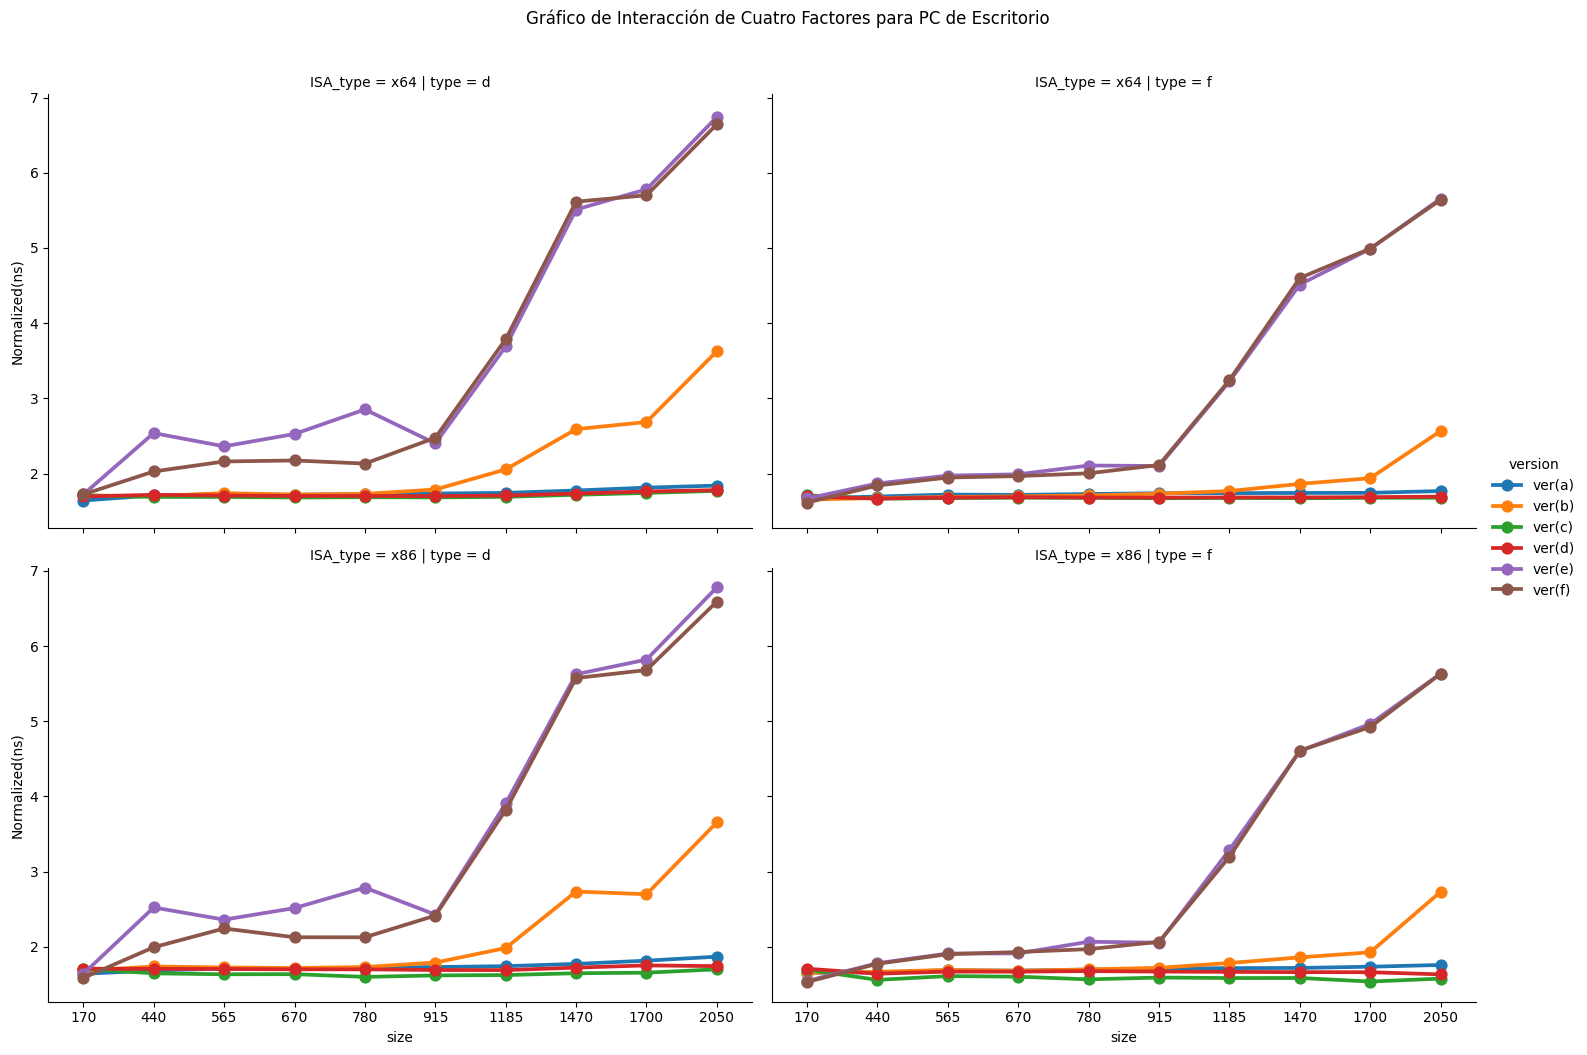


=========== ANÁLISIS PARA Laptop =============

================= Summary 'Normalized_ns' por 'version' =============


           N    Mean      SD      SE  95% Conf.  Interval
version                                                  
ver(a)   392  2.3550  0.2255  0.0114     2.3326    2.3774
ver(b)   392  2.8250  0.9714  0.0491     2.7286    2.9215
ver(c)   392  2.5625  0.0827  0.0042     2.5542    2.5707
ver(d)   392  2.4662  0.0766  0.0039     2.4586    2.4738
ver(e)   392  4.3253  2.3768  0.1200     4.0893    4.5613
ver(f)   392  4.4608  2.7221  0.1375     4.1905    4.7311
================= Summary 'Normalized_ns' por 'type' ================


         N    Mean      SD      SE  95% Conf.  Interval
type                                                   
d     1176  3.3662  1.9811  0.0578     3.2529    3.4795
f     1176  2.9654  1.4922  0.0435     2.8800    3.0508
================= Summary 'Normalized_ns' por 'size' ================


        N    Mean      SD      SE  95% Conf.  I

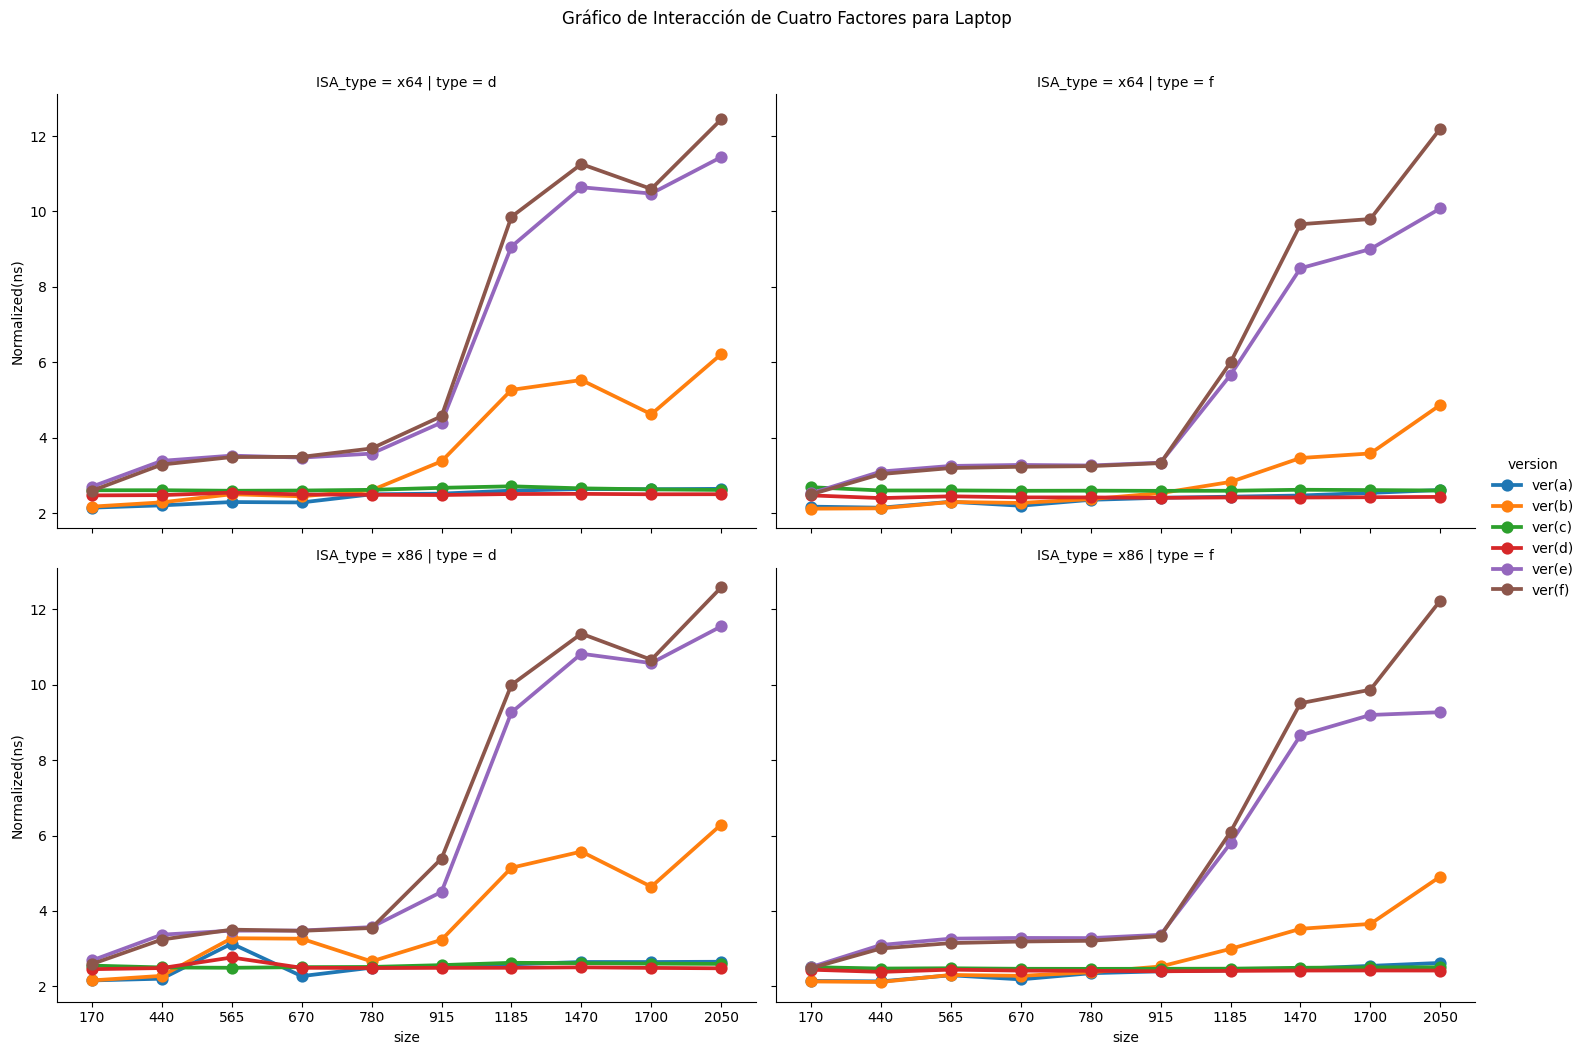

In [ ]:
# Ejecutar ANOVA y gráficos para cada computadora
realizar_anova_y_graficas(df_pc, "PC de Escritorio")
realizar_anova_y_graficas(df_laptop, "Laptop")


Finalmente, combinamos ambos conjuntos de datos (df_pc y df_laptop) en un solo DataFrame para crear un gráfico de comparación. Este gráfico permite observar las diferencias en el rendimiento entre la PC de Escritorio y la Laptop bajo las mismas condiciones experimentales.

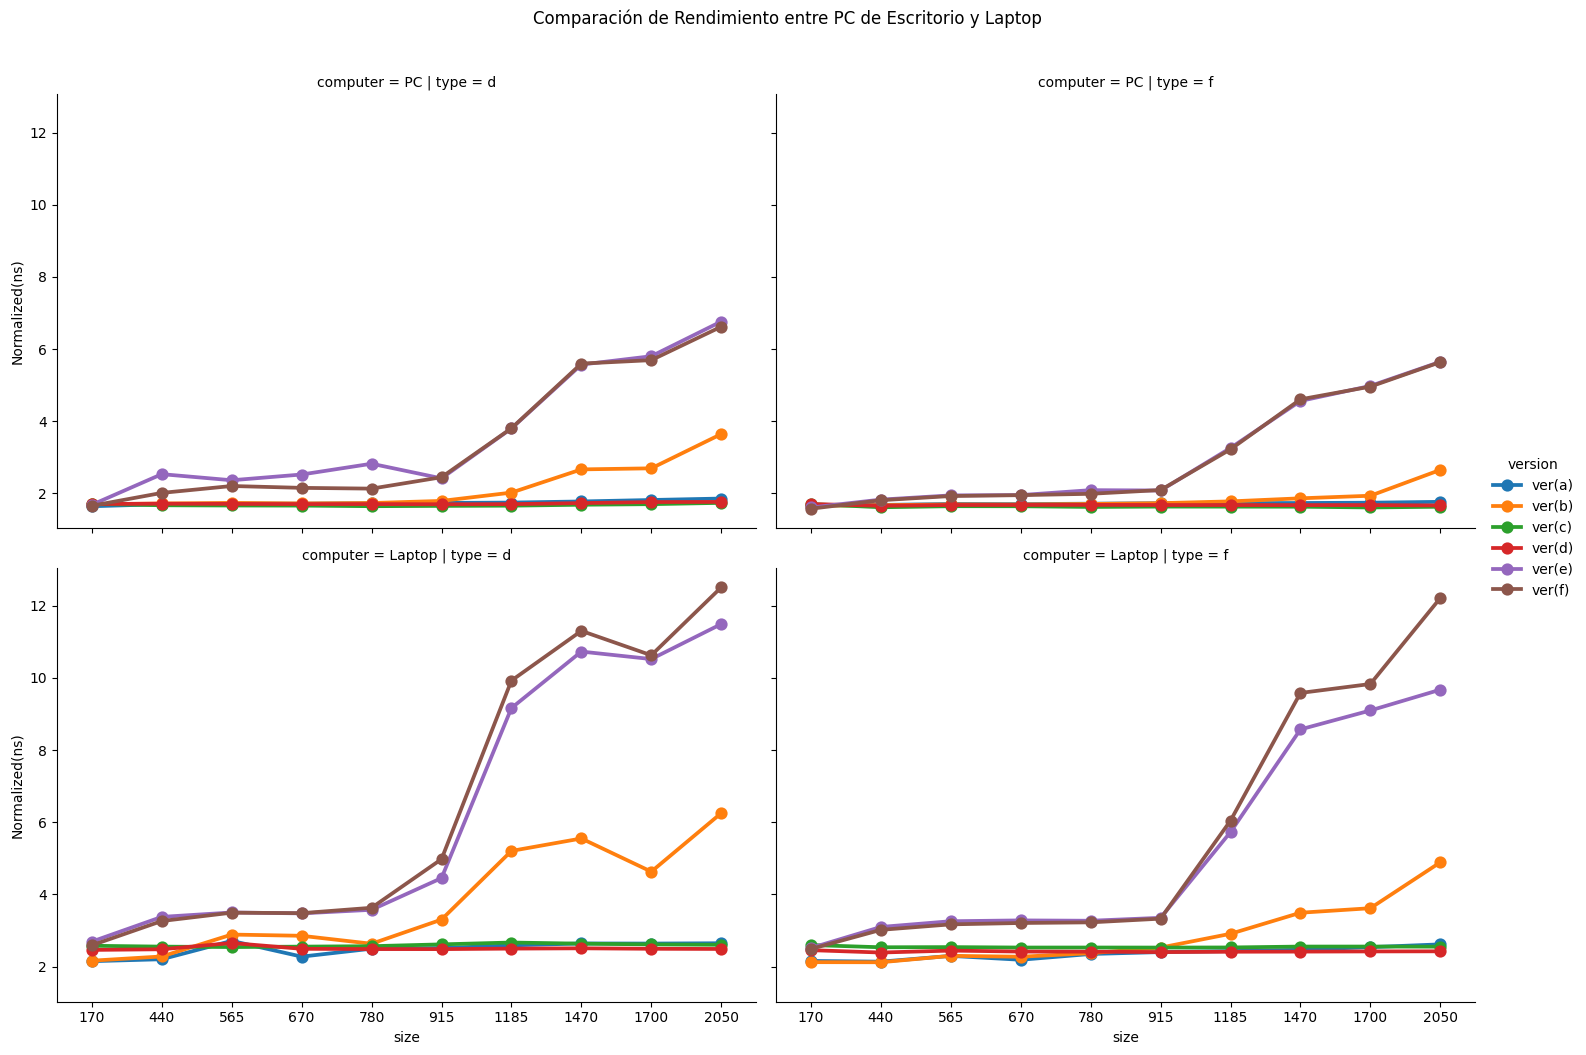

In [ ]:
# Comparación gráfica entre PC de Escritorio y Laptop para un análisis conjunto de rendimiento
df_pc['computer'] = 'PC'
df_laptop['computer'] = 'Laptop'
df_combined = pd.concat([df_pc, df_laptop])

# Gráfico comparativo de interacción entre los dos equipos
sns.catplot(
    x='size',
    y='Normalized(ns)',
    hue='version',
    col='type',        # Dividir por el factor de tipo de dato (float/double)
    row='computer',    # Comparar entre PC y Laptop
    kind='point',
    data=df_combined,
    errorbar=None,
    height=5,
    aspect=1.5
)

# Título del gráfico comparativo
plt.suptitle('Comparación de Rendimiento entre PC de Escritorio y Laptop', y=1.05)
plt.show()



### Conclusiones Generales Basadas en los Resultados del ANOVA

1. **Impacto de la Versión del Algoritmo (`version`)**:
   - El análisis ANOVA muestra que la versión del algoritmo tiene un efecto altamente significativo sobre el rendimiento, con valores de **F elevados** y **p < 0.001** tanto en la `PC de Escritorio` como en la `Laptop`. Este resultado implica que las diferencias entre versiones del algoritmo afectan sustancialmente el tiempo de ejecución.
   - En la `PC de Escritorio`, las versiones `ver(e)` y `ver(f)` registran tiempos promedio de **2.6021** ns y **2.4726** ns, respectivamente, siendo las menos eficientes. En la `Laptop`, estas mismas versiones alcanzan valores promedio de **4.3253** ns y **4.4608** ns, lo que sugiere un problema de rendimiento persistente en ambas máquinas, que podría abordarse optimizando estas versiones.

2. **Efecto del Tamaño de la Matriz (`size`)**:
   - El tamaño de la matriz también es un factor significativo, con valores **F altos** y **p < 0.001** en ambos sistemas. Esto es consistente con la expectativa de que matrices más grandes requieren tiempos de procesamiento más largos.
   - En la `PC de Escritorio`, el tiempo promedio aumenta de **1.6662** ns para matrices de tamaño 170 a **3.4469** ns para matrices de tamaño 2050. La `Laptop` muestra un patrón similar, aunque con tiempos más elevados, desde **2.4154** ns hasta **6.0315** ns. Estos resultados destacan la necesidad de adaptar el algoritmo para manejar eficientemente tamaños de matriz grandes.

3. **Efecto del Tipo de Dato (`type`)**:
   - El tipo de dato (`float` o `double`) tiene un impacto significativo en el rendimiento, con `float` superando a `double` en ambas máquinas. Esto se refleja en los valores de **F altos** y **p < 0.001**, indicando que el uso de `float` es generalmente más eficiente en términos de tiempo de ejecución.
   - En la `PC de Escritorio`, el promedio para `float` es de **1.9024** ns frente a **2.0797** ns para `double`. En la `Laptop`, los tiempos son más altos, con un promedio de **2.9654** ns para `float` y **3.3662** ns para `double`. Este resultado sugiere que `float` es una opción preferible cuando la precisión de `double` no es esencial, especialmente en contextos donde el rendimiento es una prioridad.

4. **Efecto de la Arquitectura de Instrucción (`ISA_type`)**:
   - Aunque el tipo de arquitectura (`x64` vs. `x86`) también es significativo (`p < 0.001`), su impacto en el rendimiento es menor en comparación con los otros factores.
   - En la `PC de Escritorio`, `x64` registra un tiempo promedio de **2.0034** ns, mientras que `x86` tiene un tiempo ligeramente menor de **1.9786** ns. En la `Laptop`, las diferencias son aún más sutiles, con **3.1542** ns para `x64` y **3.1774** ns para `x86`. Estos resultados sugieren que la arquitectura no es el principal determinante del rendimiento en este contexto.

5. **Interacciones entre Factores**:
   - Las interacciones entre `version`, `size`, y `type` son significativas, lo que sugiere que el efecto de un factor puede depender de los valores de los otros. Por ejemplo, algunas versiones del algoritmo están mejor optimizadas para ciertos tamaños de matriz y tipos de dato.
   - Las interacciones de tres y cuatro factores también son significativas, aunque con valores **F** más bajos. Esto sugiere que existe una combinación óptima de `version`, `size`, `type`, y `ISA_type` que puede maximizar el rendimiento en cada sistema.

### Comparación de Desempeño entre `PC de Escritorio` y `Laptop`

1. **Tiempos Promedio por Versión del Algoritmo**:
   - Los tiempos promedio de ejecución son consistentemente mayores en la `Laptop` en comparación con la `PC de Escritorio`. Por ejemplo, `ver(e)` en la `PC` tiene un tiempo de **2.6021** ns, mientras que en la `Laptop` es de **4.3253** ns, lo cual representa un aumento significativo.
   - La diferencia en el rendimiento entre ambas plataformas podría atribuirse a la menor capacidad de procesamiento y las limitaciones de la `Laptop`, indicando que la `PC de Escritorio` es una opción más adecuada para cargas de trabajo intensivas.

2. **Desviación Estándar y Consistencia**:
   - La `Laptop` muestra una mayor variabilidad en los tiempos de ejecución, especialmente para `ver(e)` y `ver(f)`, con desviaciones estándar de **2.3768** ns y **2.7221** ns, respectivamente. En contraste, la `PC de Escritorio` tiene desviaciones estándar mucho menores para estas mismas versiones, de **1.1549** ns y **1.1702** ns, lo que sugiere un rendimiento más estable en este equipo.
   - Esta diferencia en variabilidad destaca que el rendimiento en la `Laptop` es menos predecible, probablemente debido a factores de hardware como la gestión de memoria y la potencia de procesamiento.

3. **Diferencia en Rendimiento por Tipo de Dato**:
   - Ambos sistemas muestran tiempos menores al utilizar `float` en lugar de `double`, pero esta diferencia es más pronunciada en la `PC de Escritorio`. Esto podría reflejar una optimización de hardware superior en la `PC` para manejar tipos de datos de precisión simple.
   - En la `PC`, `float` reduce el tiempo promedio en aproximadamente **0.1773** ns frente a `double`, mientras que en la `Laptop` esta diferencia es de **0.4008** ns, lo cual refuerza la ventaja de `float` en ambos sistemas.

Aunque de manera general, atribuimos estos resultados a las diferencias en hardware, dado que las especificaciones del `PC de Escritorio` son considerablemente superiores.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Recomendaciones

1. **Optimización de Algoritmos**:
   - Las versiones `ver(e)` y `ver(f)` deberían ser revisadas y optimizadas, ya que presentan los mayores tiempos de ejecución. Mejoras en el uso de memoria caché y en el orden de acceso a la memoria podrían contribuir a mejorar su rendimiento en ambas plataformas.

2. **Adaptación según el Tamaño de la Matriz**:
   - Dado el fuerte impacto del tamaño de la matriz, se recomienda implementar una versión del algoritmo que ajuste dinámicamente su estructura en función del tamaño de entrada. Esto es especialmente relevante en matrices de gran tamaño, donde el rendimiento se ve más afectado, y en la `Laptop`, donde el sistema es más sensible a la carga computacional.

3. **Uso de `float` para Tareas Sensibles al Rendimiento**:
   - En aplicaciones donde la precisión de `double` no es crítica, se sugiere usar `float` para mejorar el rendimiento, en especial en la `Laptop`, donde se observa una mayor diferencia en el tiempo de procesamiento.

4. **Consideración de la Plataforma para Cargas Intensivas**:
   - La `PC de Escritorio` ha demostrado un rendimiento superior y más consistente para la mayoría de las configuraciones, por lo que se recomienda priorizar esta plataforma para experimentos o aplicaciones que requieren alta precisión y estabilidad en el tiempo de ejecución.


In [ ]:
# Lista de ejecutables para PC
import random
versions = [
".\ProductMatrix_X64_d_verProductMatByBlocks.exe",
".\ProductMatrix_X64_f_verProductMatByBlocks.exe",
".\ProductMatrix_X86_d_verProductMatByBlocks.exe",
".\ProductMatrix_X86_f_verProductMatByBlocks.exe",
]

# Lista de tamaños de matriz
matrix_sizes = [170, 440, 565, 670, 780, 915, 1185, 1470, 1700, 2050] # indique los niveles asignados por el profesor
samples =      [15,  15,  15,   15,  10,  10,    7,  5,    3,   3]


# Generar combinaciones
combinations = [
    (version, size, sample)
    for version in versions
    for size, sample in zip(matrix_sizes, samples)
]
# Aleatorizar la lista de combinaciones
random.shuffle(combinations)

# Mostrar combinaciones aleatorizadas
for combination in combinations:
    print(combination[0], combination[1],  combination[2], 49152)


.\ProductMatrix_X64_f_verProductMatByBlocks.exe 915 10 49152
.\ProductMatrix_X64_d_verProductMatByBlocks.exe 440 15 49152
.\ProductMatrix_X64_d_verProductMatByBlocks.exe 170 15 49152
.\ProductMatrix_X64_d_verProductMatByBlocks.exe 915 10 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 440 15 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 1700 3 49152
.\ProductMatrix_X64_f_verProductMatByBlocks.exe 1470 5 49152
.\ProductMatrix_X64_d_verProductMatByBlocks.exe 1700 3 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 915 10 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 565 15 49152
.\ProductMatrix_X64_f_verProductMatByBlocks.exe 1700 3 49152
.\ProductMatrix_X86_d_verProductMatByBlocks.exe 1700 3 49152
.\ProductMatrix_X64_f_verProductMatByBlocks.exe 2050 3 49152
.\ProductMatrix_X86_f_verProductMatByBlocks.exe 2050 3 49152
.\ProductMatrix_X86_d_verProductMatByBlocks.exe 1185 7 49152
.\ProductMatrix_X86_d_verProductMatByBlocks.exe 170 15 49152
.\ProductMatrix_X64_d_ve